In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
DATA_PATH = "./mp4_to_bt656/church.mp4"

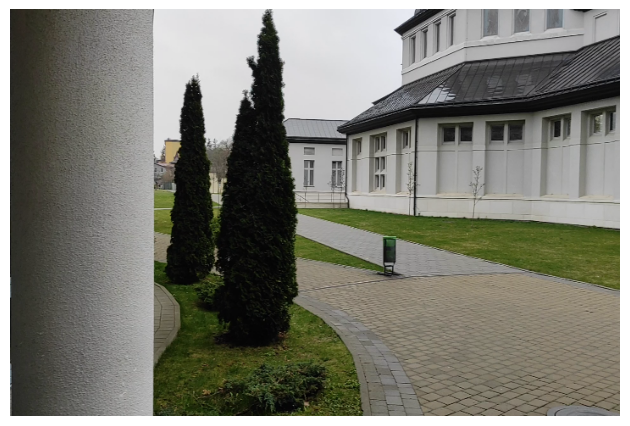

In [76]:
# read the first frame from video
cap = cv2.VideoCapture(DATA_PATH)
ret, frame = cap.read()
cap.release()
frame = cv2.resize(frame, (720, 480), cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [78]:
def line_shuffling(image, block_size):
      image = np.array(image)
      height, width, _ = image.shape
      lines = [image[i * block_size:(i + 1) * block_size, :] for i in range(height // block_size)]
      np.random.shuffle(lines)
      scrambled_image = np.vstack(lines)
      return scrambled_image


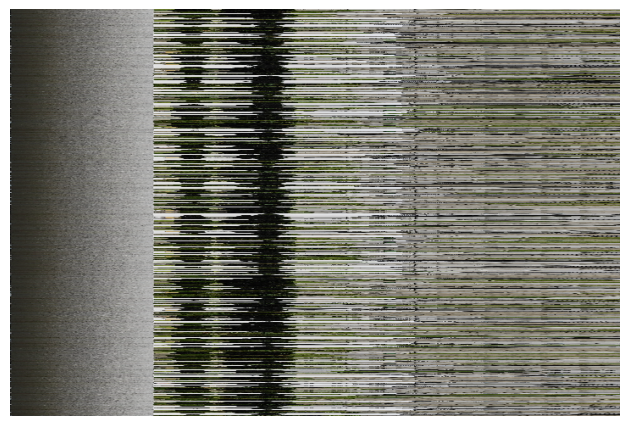

In [119]:

# Scramble the image
block_size = 1
scrambled_image = line_shuffling(frame, block_size)
plt.imshow(cv2.cvtColor(scrambled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [125]:
def get_closest_shuffled_line(reference_line, frame, visited):
   distances = []
   for i, el in enumerate(frame):
      if i not in visited:
         distances.append(np.sum(np.abs(reference_line - el)))
      else:
         distances.append(np.inf)
   closest_line = np.argmin(distances)
   visited.add(closest_line)
   return frame[closest_line]
def break_line_shuffling(frame):
   frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb).astype(int)
   visited = set()
   visited.add(0)
   reference_line = frame[0]
   visited_order = [reference_line]

   while len(visited) != len(frame):
      reference_line = get_closest_shuffled_line(reference_line, frame, visited)
      visited_order.append(reference_line)

   descrambled_image = np.array(visited_order)
   descrambled_image = descrambled_image.astype(np.uint8)
   descrambled_image = cv2.cvtColor(descrambled_image, cv2.COLOR_YCrCb2BGR)
   return descrambled_image

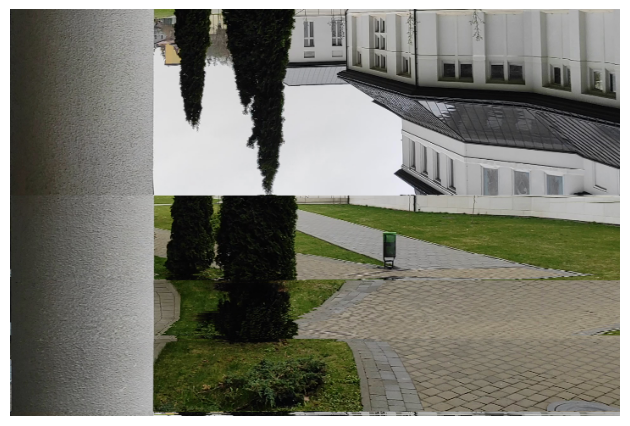

In [126]:
plt.imshow(cv2.cvtColor(break_line_shuffling(scrambled_image), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [103]:

def line_inversion(image, block_size):


   image = np.array(image)
   height, width, _ = image.shape
   lines = np.array([image[i * block_size:(i + 1) * block_size, :] for i in range(height // block_size)])
   flips = np.random.choice([0, 1], size=(len(lines),))
   for i, flip in enumerate(flips):
      if flip:
         lines[i] = 255 - lines[i]
   scrambled_image = np.vstack(lines)
   return scrambled_image


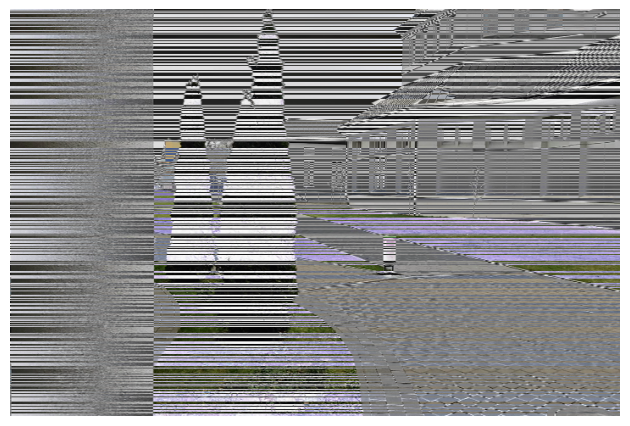

In [104]:
# Scramble the image
block_size = 1
scrambled_image = line_inversion(frame, block_size)
plt.imshow(cv2.cvtColor(scrambled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [105]:
def attack_line_inversion(frame):
   frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb).astype(int)
   reference_line = frame[0]
   unrolled_frame = [reference_line]
   for i in range(len(frame)):
      line = frame[i]
      distances = [np.sum(np.abs(reference_line - line)),
                 np.sum(np.abs(reference_line - (255 - line)))]

      if distances[0] < distances[1]:
         line = line
      else:
         line = 255 - line

      unrolled_frame.append(line)
      reference_line = line

   unrolled_frame = np.array(unrolled_frame).astype(np.uint8)
   unrolled_frame = cv2.cvtColor(unrolled_frame, cv2.COLOR_YCrCb2BGR)
   return unrolled_frame

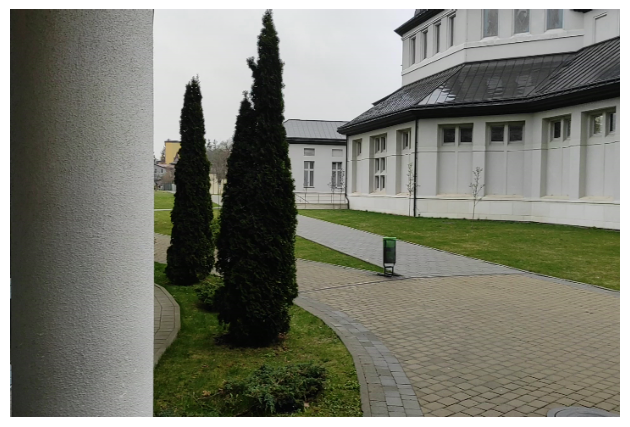

In [107]:
plt.imshow(cv2.cvtColor(attack_line_inversion(255 - scrambled_image), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [89]:
def line_rotation(image, block_size):
   image = np.array(image)
   height, width, _ = image.shape
   lines = np.array([image[i * block_size:(i + 1) * block_size, :] for i in range(height // block_size)])
   rotations = np.random.randint(0, len(image[0]), size=(len(lines),))
   for i, rotation in enumerate(rotations):
      if rotation:
         lines[i] = np.roll(lines[i], rotation, axis=1)
   scrambled_image = np.vstack(lines)
   return scrambled_image

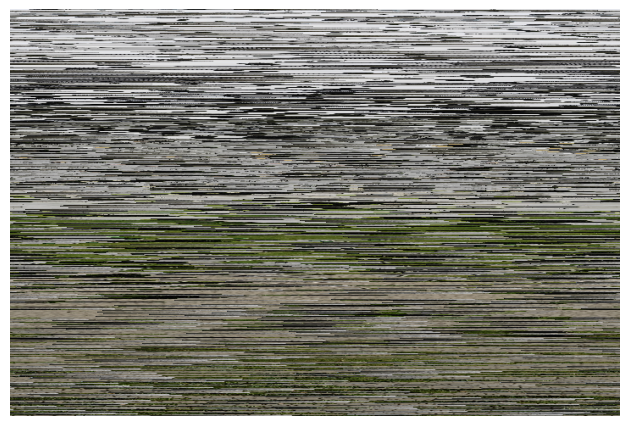

In [108]:
# Scramble the image
block_size = 1
scrambled_image = line_rotation(frame, block_size)
plt.imshow(cv2.cvtColor(scrambled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

In [112]:
def get_closest_rotation(reference_line, line):
   distances = []
   rolled_line = line
   for j in range(0, len(line), 1):
       # distances.append(np.linalg.norm(reference_line - rolled_line))
       distances.append(np.sum(np.abs(reference_line - rolled_line)))
       rolled_line = np.roll(rolled_line, 1, axis=0)
   optimal_roll = np.argmin(distances)
   line = np.roll(line, optimal_roll * 1, axis=0)
   return line
def break_line_rotator(frame):
   frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb).astype(int)
   reference_line = frame[0]
   unrolled_frame = [reference_line]
   for i in range(len(frame)):
       line = frame[i]

       reference_line = get_closest_rotation(reference_line, line)
       unrolled_frame.append(reference_line)
   unrolled_frame = np.array(unrolled_frame).astype(np.uint8)
   unrolled_frame = cv2.cvtColor(unrolled_frame, cv2.COLOR_YCrCb2BGR)
   return unrolled_frame

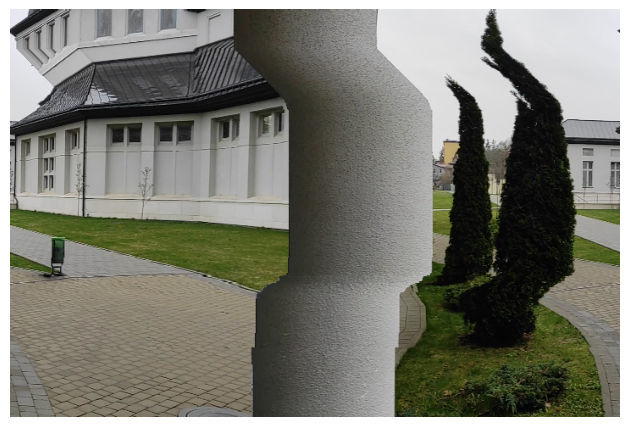

In [113]:
unrolled_frame = break_line_rotator(scrambled_image)
plt.imshow(cv2.cvtColor(unrolled_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

# Combining all results in fairly strong algorithm

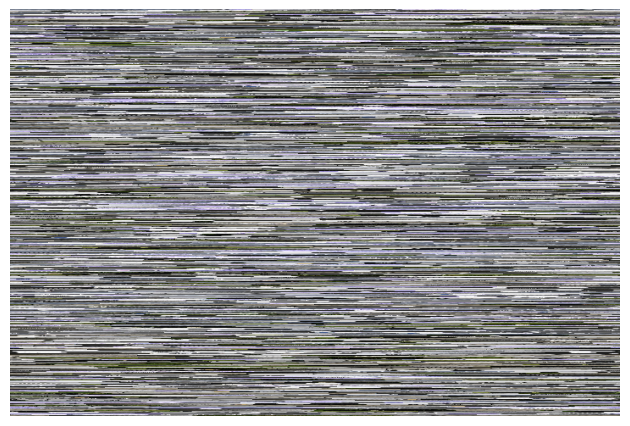

In [93]:
block_size = 1
scrambled_image = line_inversion(line_rotation(line_shuffling(frame, block_size), block_size), block_size)
plt.imshow(cv2.cvtColor(scrambled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()